In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Style 1: direct use of pyplot module methods (for quick and dirty plots!)
#Style 2: use of OO interface (recommended for better control over different aspects of the plot)
#Style 3: direct use of plot methods of dataframes (convenience method only!)

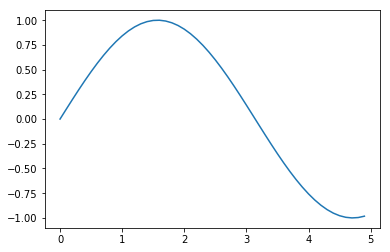

In [4]:
#Style 1: pyplot module is MATLAB style state-based interface and 
#mainly intended for simple cases of programmatic, interactive plots
#
#The object-oriented API is recommended for more complex plots (to be seen later - more powerful)
#
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

In [7]:
plt.plot?

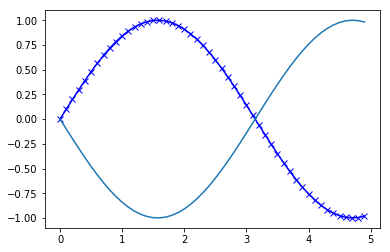

In [6]:
#stateful mode - current figure and axes are remembered by the session and all plt commands applied
#in that context - difficult to add something to an earlier plot once a later plot has been created
f = plt.figure()
plt.plot(x, y,'-xb')
plt.plot(x,-y)
f.savefig('my_waves.pdf',facecolor='lightgrey',transparent=True)
#f.savefig('my_waves.png',facecolor='lightgrey',transparent=True)

In [5]:
f.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [9]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


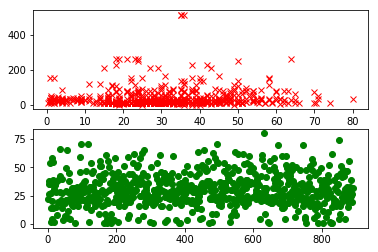

In [12]:
# create the first of two panels and set current axis
plt.subplot(2,1,1)
plt.plot(titanic.Age,titanic.Fare,'rx')
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(titanic.PassengerId,titanic.Age,'go')

In [8]:
#Style 2: OO way - no notion of "active" figure and axes, the plotting functions are 
#methods of
#explicit Figures and Axes objects
#Figures contain Axes (one or more)
#Axes are the area of the plot

<class 'matplotlib.axes._subplots.AxesSubplot'>


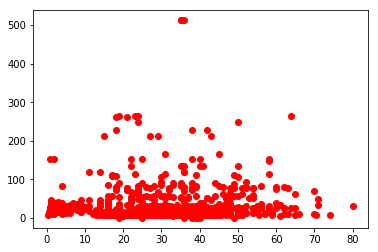

In [14]:
# First create a grid of plots
# ax1 will be an array of one Axes object
fig1, ax1 = plt.subplots()
print(type(ax1))
# Call plot() method on the appropriate object
ax1.plot(titanic.Age,titanic.Fare,'ro')

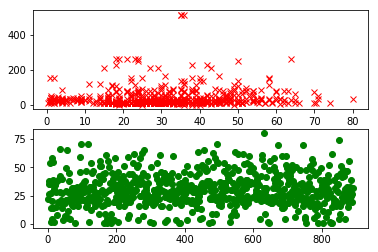

In [16]:
# ax will be an array of two Axes object
fig2, ax2 = plt.subplots(2)
ax2[0].plot(titanic.Age,titanic.Fare,'rx')
ax2[1].plot(titanic.PassengerId,titanic.Age,'go')
#ax2[2].plot(titanic.PassengerId,titanic.Age,'go')

In [11]:
type(f)

matplotlib.figure.Figure

In [12]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

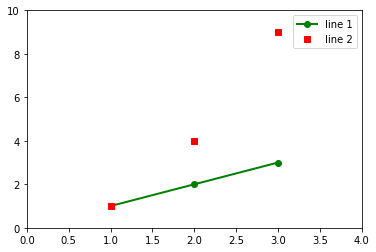

In [18]:
fig, ax = plt.subplots() #create a tuple
#x and y are lists
ax.plot([1,2,3], [1,2,3], 'go-', label='line 1', linewidth=2) #green circle marker with solid line style
ax.plot([1,2,3], [1,4,9], 'rs',  label='line 2') # red square marker with no line
ax.axis([0, 4, 0, 10]) #setting axis limits
ax.legend() #asking to show legend

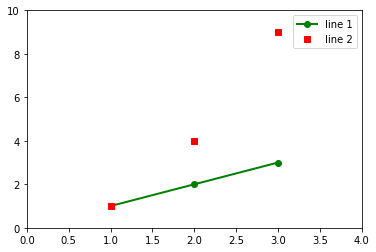

In [14]:
fig, ax = plt.subplots() #create a tuple
#x is an ndarray and y is a list
ax.plot(np.array([1,2,3]), [1,2,3], 'go-', label='line 1', linewidth=2) #green circle marker with solid line style
ax.plot([1,2,3], [1,4,9], 'rs',  label='line 2') # red square marker with no line
ax.axis([0, 4, 0, 10]) #setting axis limits
ax.legend() #asking to show legend

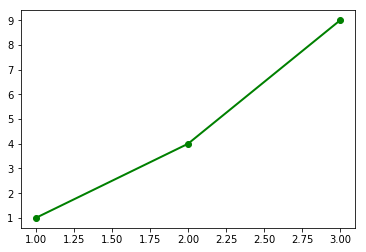

In [15]:
fig, ax = plt.subplots() #create a tuple
ax.plot(pd.Series([1,2,3]), pd.Series([1,4,9]), 'go-', label='line 1', linewidth=2) 
#input types: ndarray 

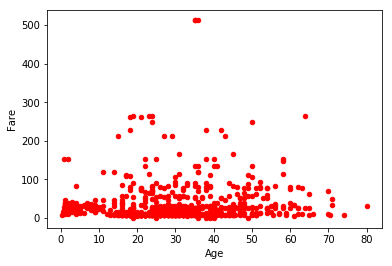

In [16]:
#Style 3: pandas dataframe allow direct use of plots (convenience methods for quick plots)
titanic.plot(kind='scatter',x='Age',y='Fare',color='red')

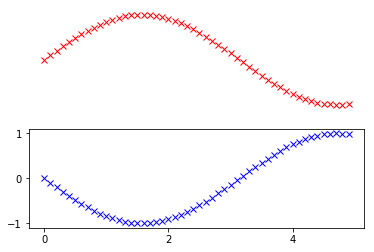

In [5]:
#stateful vs OO - 1
plt.subplot(2,1,1)
plt.plot(x, y,'rx')
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, -y,'bx')
#here in order to modify the axes object we have to go through extra levels of indirection
#by accessing the current plot sub-objects/objects
plt.gca().set_xticks([0,2,4])  #gca = get current axes which is actually the second axes object (subplot)
f = plt.gcf()                  #gcf = get current figure (so that we can get all the axes objects it has)
f.get_axes()[0].set_axis_off() #through the current figure get the first axes object (subplot)

<class 'matplotlib.axes._subplots.AxesSubplot'>


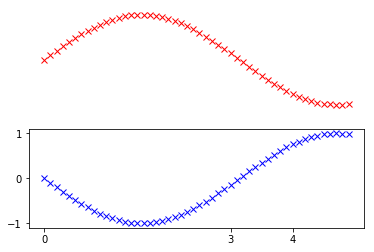

In [6]:
#stateful vs OO - 2
f1,a1 = plt.subplots(2)
a1[0].plot(x, y,'rx')
a1[1].plot(x, -y,'bx')
ax1 = a1[0]; ax2 = a1[1]; print(type(ax1))
#here we can directly catch the relevant object and work on it in a much easier and transparent manner
#although the end result will be same
ax1.set_axis_off()
ax2.set_xticks([0,3,4])

<class 'matplotlib.axes._subplots.AxesSubplot'>


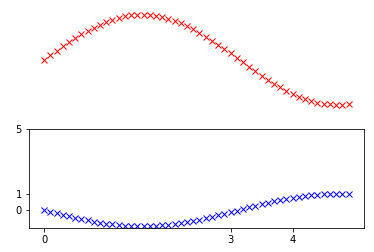

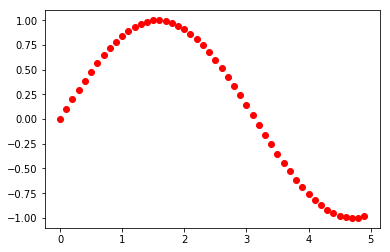

In [10]:
#stateful vs OO - 3
f1,a1 = plt.subplots(2)
a1[0].plot(x, y,'rx')
a1[1].plot(x, -y,'bx')
ax1 = a1[0]; ax2 = a1[1]; print(type(ax1))
#here we can directly catch the relevant object and work on it in a much easier and transparent manner
#although the end result will be same
ax1.set_axis_off()
ax2.set_xticks([0,3,4])
f2,a2 = plt.subplots()
a2.plot(x, y,'ro')
ax2.set_yticks([0,1,5])

/Users/sudeepmallick/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


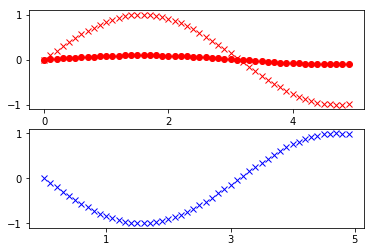

In [17]:
#stateful vs OO - 4
plt.subplot(2,1,1)
plt.plot(x, y,'rx')
# create the second panel and create the subplot
plt.subplot(2, 1, 2)
plt.plot(x, -y,'bx')
#change the current subplot back to the first one
#now add another plot of data to the first axes subplot (by specifying the specific subplot)
plt.subplot(2, 1, 1)
plt.plot(x, y/10,'ro')
#change the x ticks for the current axes object which is actually the 1st axes subplot
plt.gca().set_xticks([0,2,4])
#change the current subplot again to the second one
plt.subplot(2, 1, 2)
plt.gca().set_xticks([1,3,5])

In [17]:
#Axes has 2 Axis objects, title, x-label, y-label 
#methods: set_xlim, set_title, set_xlabel
#Axis: set graph limits, generate ticks (Locator), tick labels (Formatter)
#Artist: everything is Artist - Figure, Axes, Axis, Text, Line2D, Patch, etc.
#most Artists are tied to an Axes and cannot be shared by other Axes or moved around among them

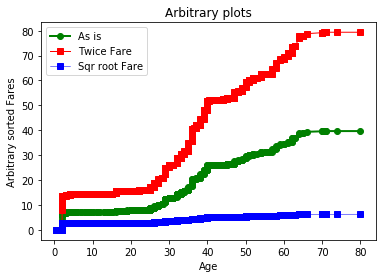

In [18]:
#let's create some meaningless plots with titanic data using style (1)
plt.plot(titanic.Age.sort_values(),titanic.Fare.sort_values(), 'go-', label='As is', linewidth=2)
plt.plot(titanic.Age.sort_values(),titanic.Fare.sort_values()*2, 'rs-', label='Twice Fare', linewidth=1)
plt.plot(titanic.Age.sort_values(),titanic.Fare.sort_values()**0.5, 'bs-', label='Sqr root Fare', linewidth=0.5)
plt.xlabel('Age')
plt.ylabel('Arbitrary sorted Fares')
plt.title('Arbitrary plots')
plt.legend()

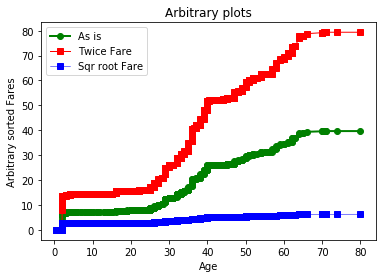

In [19]:
#let's create some meaningless plots with titanic data using style (2)
fig, ax = plt.subplots() #create a tuple
ax.plot(titanic.Age.sort_values(),titanic.Fare.sort_values(), 'go-', label='As is', linewidth=2)
ax.plot(titanic.Age.sort_values(),titanic.Fare.sort_values()*2, 'rs-', label='Twice Fare', linewidth=1)
ax.plot(titanic.Age.sort_values(),titanic.Fare.sort_values()**0.5, 'bs-', label='Sqr root Fare', linewidth=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Arbitrary sorted Fares')
ax.set_title('Arbitrary plots')
ax.legend()

In [20]:
#suggestion: use pyplot for interactive / trial purpose (jupyter notebook) but OO style in scripts, etc.

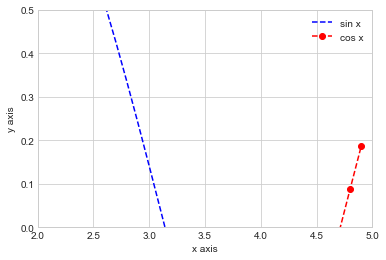

In [21]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, np.sin(x - 0), color='blue',linestyle='dashed',label='sin x')
#Line styles / marker and colors are combined in a single format string - check details using plt.plot?
plt.plot(x, np.cos(x - 0), '--or',label='cos x')
plt.xlim(2,5)
plt.ylim(0,0.5)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
#comment out the previous 2 lines to see the full untruncated figure

In [22]:
#try using the OO style with some changes
#
#plt.plot() -> ax.plot(), plt.legend() -> ax.legend()
#plt.xlabel() -> ax.set_xlabel() 
#plt.ylabel() -> ax.set_ylabel()
#plt.xlim() -> ax.set_xlim()
#plt.ylim() -> ax.set_ylim()
#plt.title() -> ax.set_title()

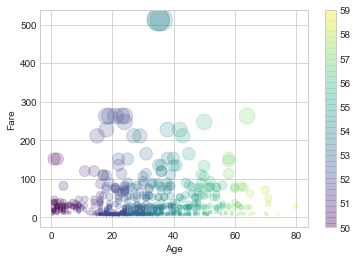

In [23]:
#scatter plots can be created using plt.plot or plt.scatter (plt.scatter allows better customization)
#plt.plot more efficient for large datasets
#colors = np.random.rand(titanic.shape[0])
colors = pd.cut(titanic.Age,10,labels=np.arange(50,60))
sizes = pd.cut(titanic.Fare,500,labels=np.arange(0,500))
plt.scatter(titanic.Age,titanic.Fare,marker='o',c=colors,s=sizes,cmap = 'viridis',alpha=0.2)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar()

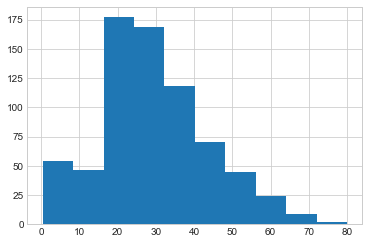

In [24]:
#histograms
titanic.Age.hist()

(array([ 30.,  14.,  10.,  14.,   3.,  29.,  39.,  65.,  73.,  42.,  65.,
         62.,  33.,  47.,  38.,  21.,  28.,  21.,  16.,  14.,  15.,   7.,
          9.,   8.,   4.,   0.,   5.,   1.,   0.,   1.]),
 array([  0.42      ,   3.07266667,   5.72533333,   8.378     ,
         11.03066667,  13.68333333,  16.336     ,  18.98866667,
         21.64133333,  24.294     ,  26.94666667,  29.59933333,
         32.252     ,  34.90466667,  37.55733333,  40.21      ,
         42.86266667,  45.51533333,  48.168     ,  50.82066667,
         53.47333333,  56.126     ,  58.77866667,  61.43133333,
         64.084     ,  66.73666667,  69.38933333,  72.042     ,
         74.69466667,  77.34733333,  80.        ]),
 <a list of 30 Patch objects>)

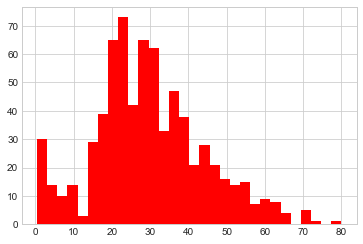

In [25]:
plt.hist(titanic.Age[~np.isnan(titanic.Age)],bins=30,color='red')

In [26]:
counts, bin_edges = np.histogram(titanic.Age[~np.isnan(titanic.Age)],bins=20)
print(counts); print("----")
print(bin_edges)

[40 14 15 31 79 98 85 84 73 45 35 35 29 16 13 11  4  5  1  1]
----
[  0.42    4.399   8.378  12.357  16.336  20.315  24.294  28.273  32.252
  36.231  40.21   44.189  48.168  52.147  56.126  60.105  64.084  68.063
  72.042  76.021  80.   ]


(array([ 496.,  191.,   45.,   45.,   48.,   13.,   11.,   11.,    9.,
           2.,    0.,    0.,    5.,    4.,    2.,    6.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    3.]),
 array([   0.     ,   17.07764,   34.15528,   51.23292,   68.31056,
          85.3882 ,  102.46584,  119.54348,  136.62112,  153.69876,
         170.7764 ,  187.85404,  204.93168,  222.00932,  239.08696,
         256.1646 ,  273.24224,  290.31988,  307.39752,  324.47516,
         341.5528 ,  358.63044,  375.70808,  392.78572,  409.86336,
         426.941  ,  444.01864,  461.09628,  478.17392,  495.25156,
         512.3292 ]),
 <a list of 30 Patch objects>)

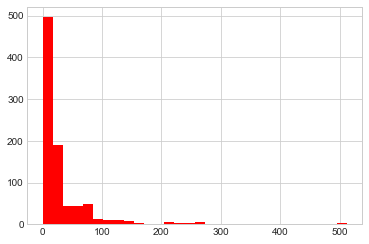

In [27]:
plt.hist(titanic.Fare,bins=30,color='red')

In [28]:
#recommended approach use functions to generalize mutliple plots
def my_plotter(ax, data1, data2, xlab,ylab,param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title('Arbitrary plots')
    return out

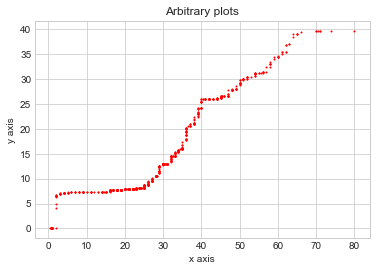

In [29]:
fig, ax = plt.subplots(1, 1)
d1 = titanic.Age.sort_values()
d2 = titanic.Fare.sort_values()
#my_plotter(ax, d1,d2,'my_xlab','my_ylab',{'label':'As is', 'linewidth':0.5, 'marker':'o','markersize':1,'color':'r'})
my_plotter(ax, d1,d2,'x axis','y axis',{'label':'As is', 'linestyle':'', 'marker':'o','markersize':1,'color':'r'})
#check Line2D parameters

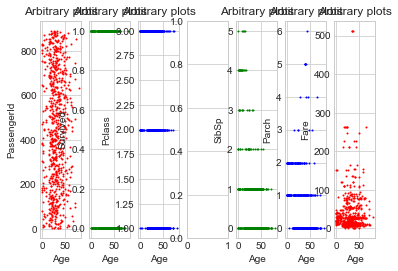

In [30]:
titan_num_cols = titanic.select_dtypes(include=['float64','int64']).columns
fig, ax = plt.subplots(1, len(titan_num_cols))
my_colours = ['r','g','b']*3
#d1 = titanic.Age.sort_values()
#d2 = titanic.Fare.sort_values()
#titan_age_col = titanic.Age.sort_values()
for i,col in enumerate(titan_num_cols):
    if col != 'Age':
        #print("ploting ",i, " ",col)
        my_plotter(ax[i], titanic['Age'],titanic[col],'Age',col,
                   {'linestyle':'', 'marker':'o','markersize':1,'color':my_colours[i]})

In [31]:
#Artist is one of the layers of matplotlib API that we will be working with
#Artists - 2 types : 1) objects that we paint - primitives (Line2D,Rectangle,etc.) 
#2) the containers for the objects (Axes, Axis,Figure)

In [32]:
#1. Create Figure
#2. Create Axes or Subplot instances
#3. Use Axes functions to create the primitives

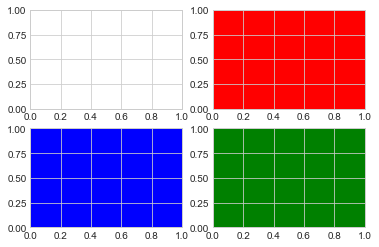

In [35]:
#fig = plt.figure()
fig = plt.figure()
fig.add_subplot(221)   #top left
fig.add_subplot(222,facecolor='r')   #top right
fig.add_subplot(223,facecolor='b')   #bottom left
fig.add_subplot(224,facecolor='g')   #bottom right 

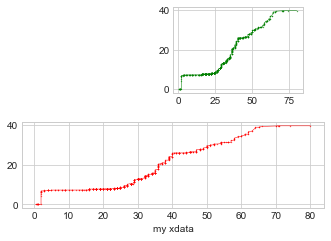

In [36]:
#a way to add Axes at any arbitary location
fig = plt.figure()
ax1 = fig.add_axes([0.15, 0.1, 0.7, 0.3]) #[left,bottom,width,height]
ax2 = fig.add_axes([0.5, 0.5, 0.3, 0.3]) #[left,bottom,width,height]
ax1.plot(titanic.Age.sort_values(),titanic.Fare.sort_values(), 'ro-', linewidth=0.5,markersize=0.3)
ax2.plot(titanic.Age.sort_values(),titanic.Fare.sort_values(), 'go-', linewidth=0.5,markersize=0.3)
xtext = ax1.set_xlabel('my xdata') # xdata is Text instance of XAxis, similarly there is an YAxis for each Axes

In [37]:
type(xtext)
#XAxis and YAxis manage the ticks, ticklabels, axis labels, layout

matplotlib.text.Text

In [38]:
type(ax1)

matplotlib.axes._axes.Axes

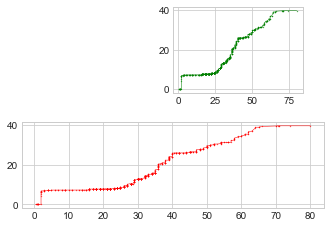

In [39]:
fig = plt.figure()
ax1 = fig.add_axes([0.15, 0.1, 0.7, 0.3]) #[left,bottom,width,height]
ax2 = fig.add_axes([0.5, 0.5, 0.3, 0.3]) #[left,bottom,width,height]
ax1.plot(titanic.Age.sort_values(),titanic.Fare.sort_values(), 'ro-', linewidth=0.5,markersize=0.3)
ax2.plot(titanic.Age.sort_values(),titanic.Fare.sort_values(), 'go-', linewidth=0.5,markersize=0.3)
fig.subplots_adjust?

In [40]:
ax1.plot?

Text(0,0.5,'volts')

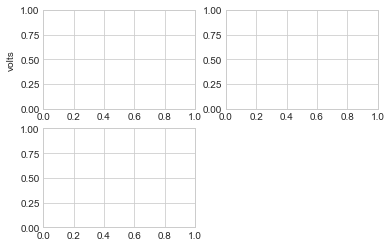

In [41]:
fig = plt.figure()
#fig.subplots_adjust(0.8)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.set_ylabel('volts')

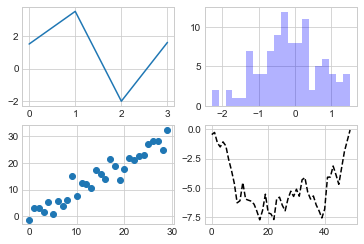

In [42]:
fig1 = plt.figure()
#params - i,j,k - grid of i x j and kth plot in the grid
sub_plot1 = fig1.add_subplot(2,2,1)
#plots on the current sub plot
plt.plot([1.5, 3.5, -2, 1.6])
sub_plot2 = fig1.add_subplot(2,2,2)
sub_plot3 = fig1.add_subplot(2,2,3)
sub_plot4 = fig1.add_subplot(2,2,4)
#--k : -- is dashed style and k is black colour
plt.plot(np.random.randn(50).cumsum(), 'k--')
#plots on the called (invoked) sub plot
sub_plot2.hist(np.random.randn(100),bins=20,color='b',alpha=0.3)
sub_plot3.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

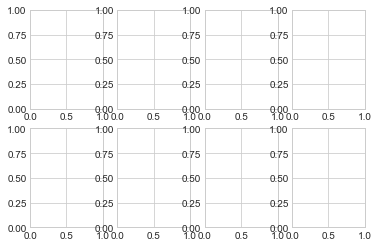

In [43]:
#create a grid of subplots and return an array of subplot objects
fig, axes = plt.subplots(2, 4)

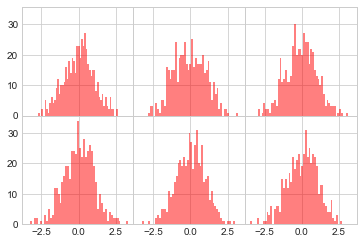

In [44]:
fig2, axes2 = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        axes2[i,j].hist(np.random.randn(500), bins=50, color='r',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

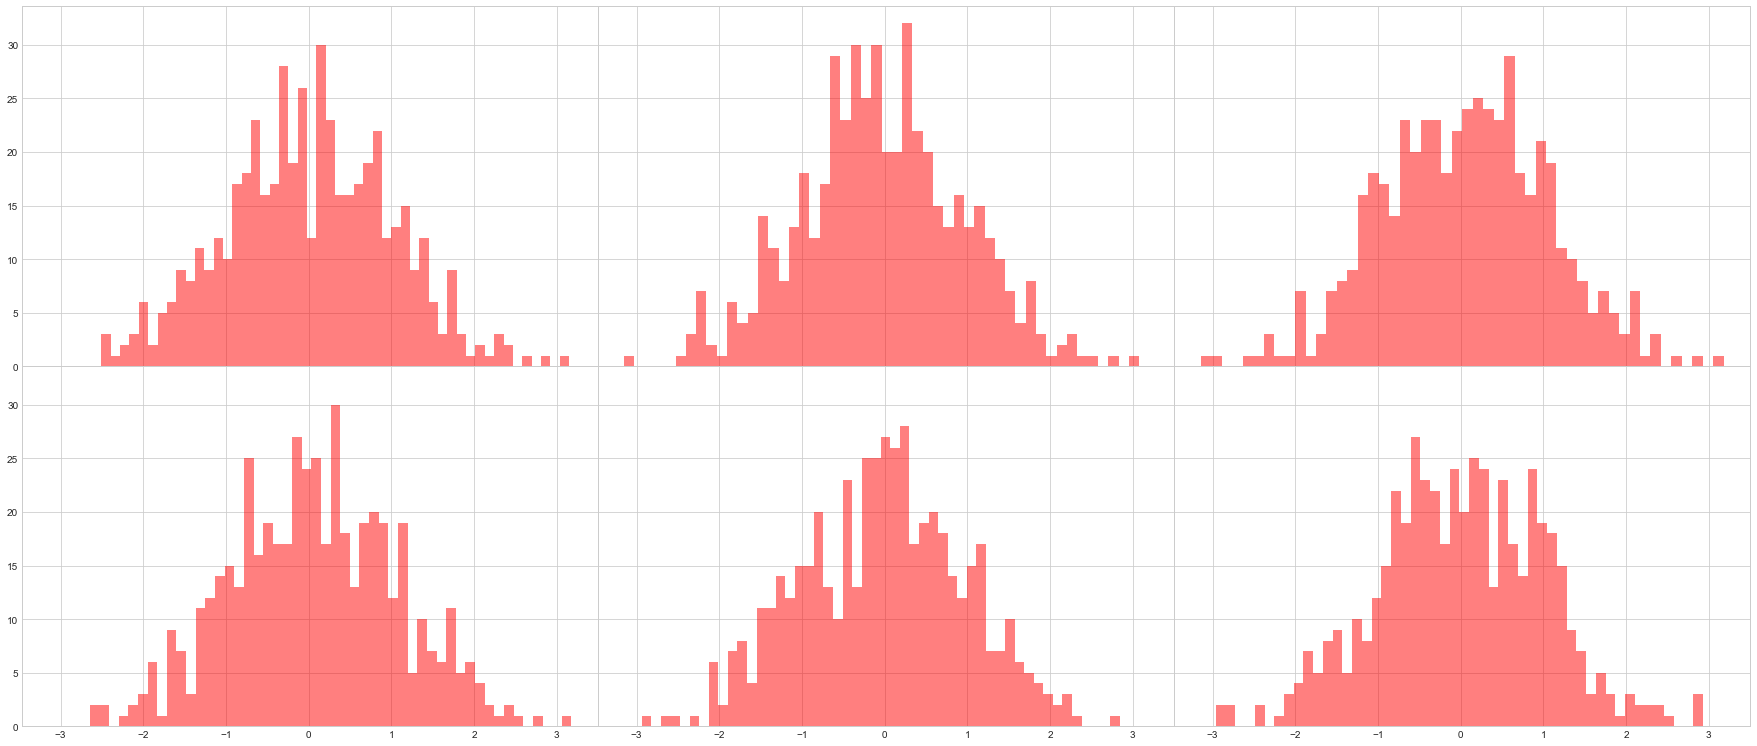

In [45]:
fig2, axes2 = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        axes2[i,j].hist(np.random.randn(500), bins=50, color='r',alpha=0.5)
plt.subplots_adjust(left=1,right=5,bottom=1.5,top=4,wspace=0,hspace=0)

In [46]:
#we created an array of subplots earlier, so first access the subplot object from the array using array
#notation and then invoke the get_xlim method on it to the x-axis limits
axes2[0,1].get_xlim()

(-3.4701719408466758, 3.4965492323588849)

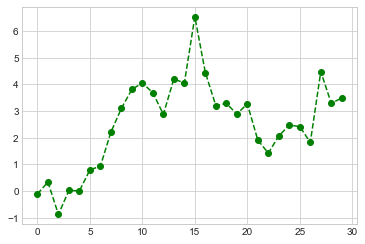

In [47]:
plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

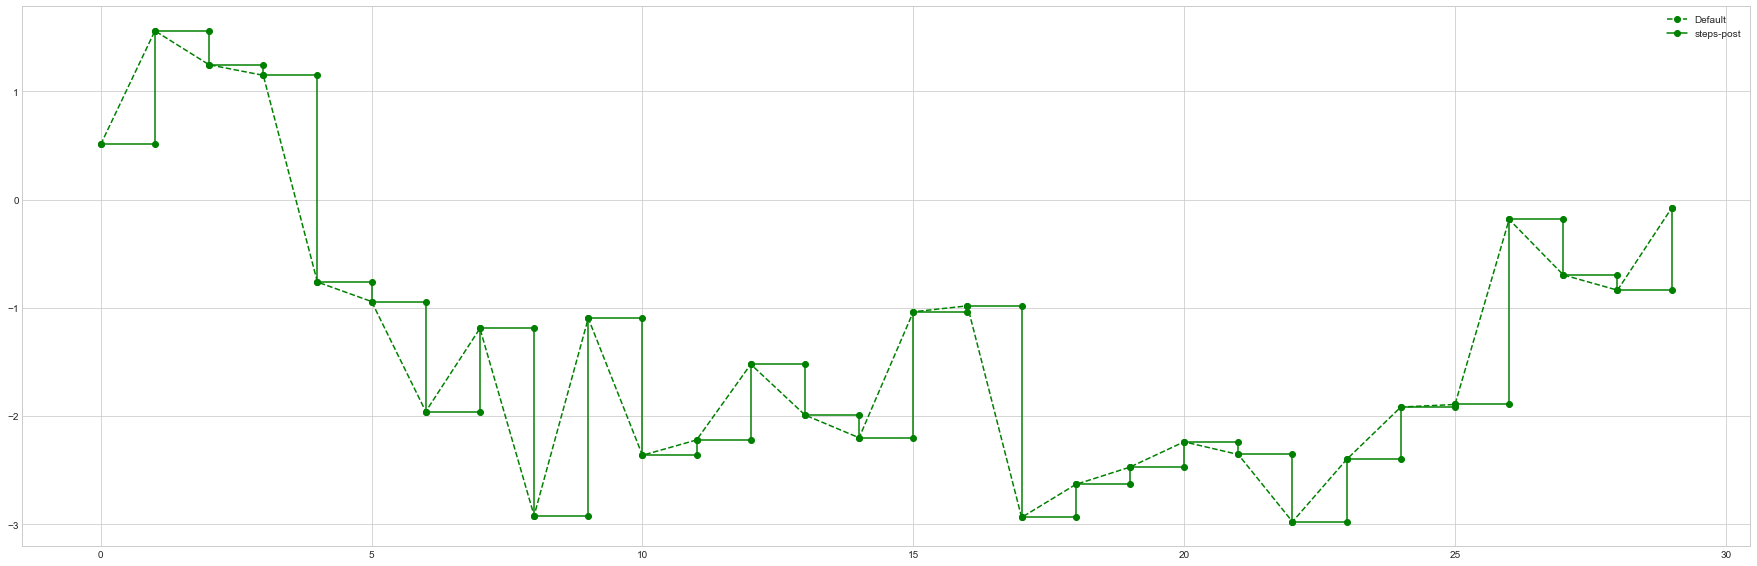

In [48]:
arr1 = np.random.randn(30).cumsum()
plt.plot(arr1, color='g', linestyle='dashed', marker='o',label='Default')
plt.plot(arr1, color='g', linestyle='solid', marker='o',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')
plt.subplots_adjust(left=1,right=5,top=2)

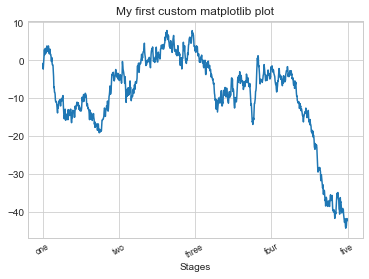

In [49]:
fig = plt.figure()
sub1 = fig.add_subplot(1, 1, 1)
sub1.plot(np.random.randn(1000).cumsum())
ticks = sub1.set_xticks([0, 250, 500, 750, 1000])
labels = sub1.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
sub1.set_title('My first custom matplotlib plot')
sub1.set_xlabel('Stages')
plt.show()

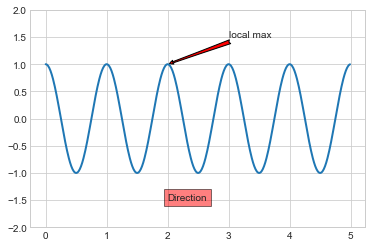

In [50]:
#annotation and text and arrow
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red', arrowstyle='fancy'),
            )
ax.set_ylim(-2, 2)
ax.text(2, -1.5, "Direction", size=10, bbox=dict(facecolor='red',alpha=0.5))
plt.show()

In [51]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

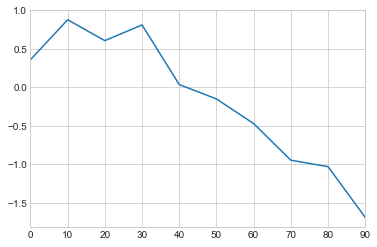

In [52]:
s.plot()

In [53]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.489048,-0.850389,1.129459,1.434491
10,-1.196702,-1.996244,1.376678,2.562808
20,-1.864294,-2.067732,0.968301,1.921571
30,-2.383424,-0.700626,1.818266,3.622701
40,-2.251039,-2.141856,1.740328,5.574072
50,-1.149339,-2.880179,1.814926,4.925273
60,-2.356450,-4.726565,1.760972,5.539546
70,-5.385337,-3.914139,3.745996,6.194334
80,-5.149215,-2.863155,2.827104,6.822827
90,-5.220197,-1.649064,3.420903,7.218664


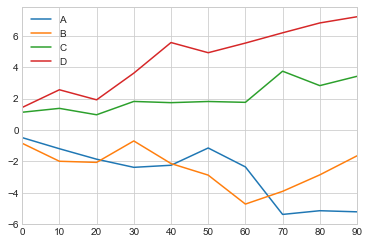

In [54]:
df.plot(grid=True)

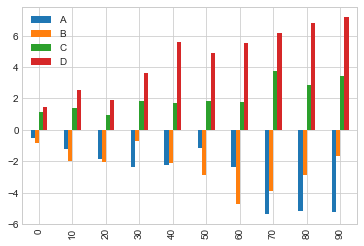

In [56]:
df.plot.bar()

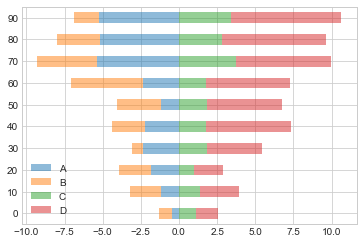

In [57]:
df.plot.barh(stacked=True,alpha=0.5)

In [58]:
#distribution plots (distribution of points) - histplot, kdeplot,ecdplot,rugplot (displot)
#relational plots - scatterplot,lineplot (relplot)
#categorical plots - stripplot, swarmplot, boxplot, violinplot, pointplot,barplot (catplot)

In [2]:
import seaborn as sns

In [60]:
#sets default seaborn theme instead of matplotlib default theme
sns.set_theme()

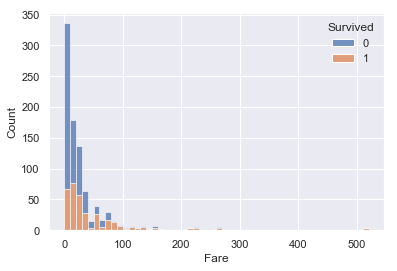

In [61]:
sns.histplot(data=titanic,x="Fare",hue="Survived",multiple="stack",binwidth=10)

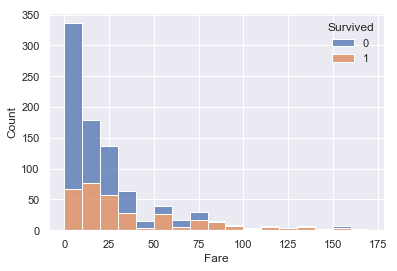

In [62]:
sns.histplot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack",binwidth=10)

In [63]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [64]:
titanic.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [65]:
titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

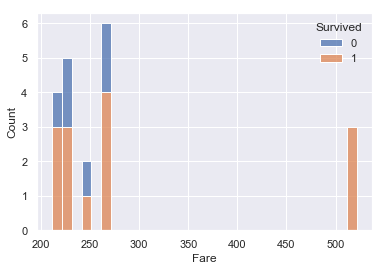

In [66]:
#higher fares survival rate much higher
sns.histplot(data=titanic[titanic['Fare']>200],x="Fare",hue="Survived",multiple="stack",binwidth=10)

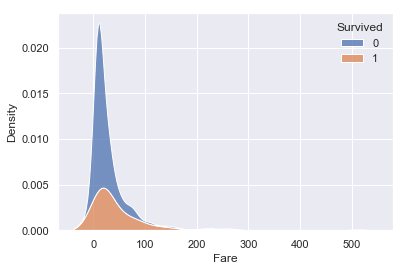

In [67]:
sns.kdeplot(data=titanic,x="Fare",hue="Survived",multiple="stack")

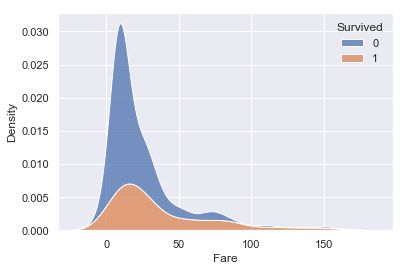

In [68]:
sns.kdeplot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack")

In [69]:
#axes vs figure level functions
#axes level - plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function
#figure level -  figure-level functions interface with matplotlib through a seaborn object, 
# usually a FacetGrid, that manages the figure

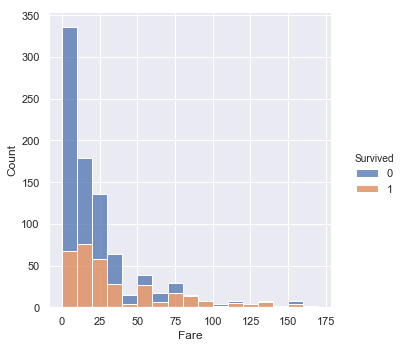

In [70]:
#sns.histplot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack",binwidth=10)
sns.displot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack",binwidth=10)

In [71]:
#steps to get back the default matplotlib style
#mpl.style.available?
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

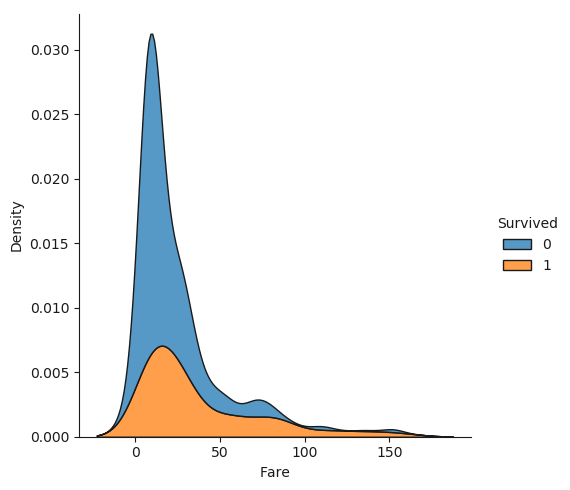

In [72]:
#using the figure level plot displot to plot an axes level plot kdeplot
sns.displot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack",kind="kde")

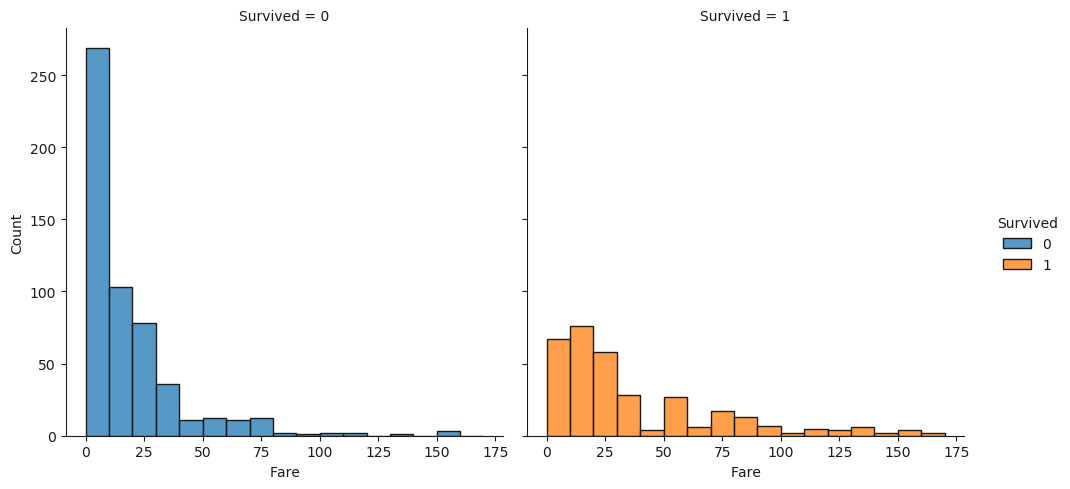

In [73]:
#using figure level plot to facet out along a categorical value i.e. draw multiple plots in the same figure
#col is the number of columns
sns.displot(data=titanic[titanic['Fare']<=200],x="Fare", hue="Survived",col='Survived',binwidth=10)

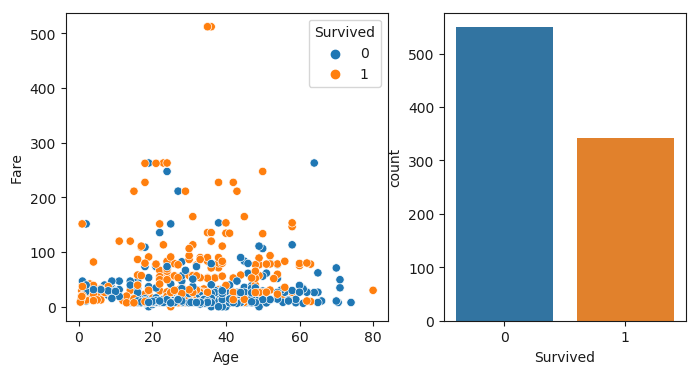

In [74]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=titanic,x="Age",y="Fare",hue="Survived", ax=axs[0])
sns.countplot(data=titanic,x="Survived",hue_order="Survived",ax=axs[1])

In [75]:
import matplotlib.lines as lines

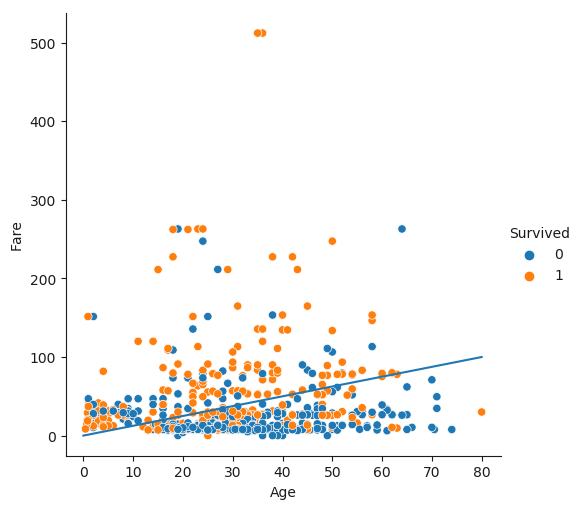

In [76]:
#since relplot is a figure level plot you can add components to it by accessing its axes component 
g = sns.relplot(data=titanic,x="Age",y="Fare",hue="Survived")
#type(g.ax)
#type(g)
g.ax.add_line(line=lines.Line2D([0, 80], [0, 100]))

In [77]:
matplotlib.__version__

'2.1.2'

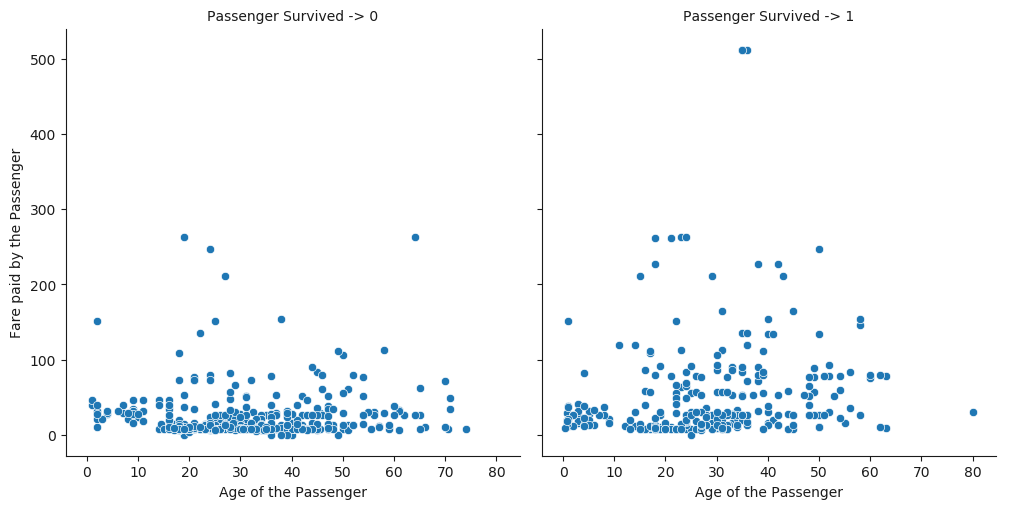

In [78]:
g = sns.relplot(data=titanic,x="Age",y="Fare",col="Survived")
g.set_axis_labels('Age of the Passenger','Fare paid by the Passenger')
g.set_titles("Passenger {col_var} -> {col_name}")

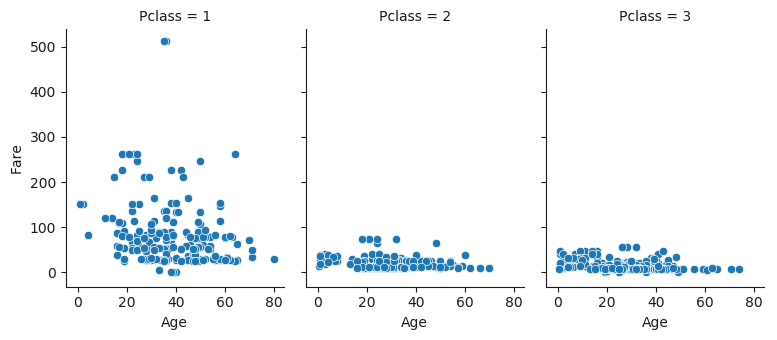

In [79]:
g = sns.FacetGrid(titanic, col="Pclass", height=3.5, aspect=.75)
g.map(sns.scatterplot,"Age","Fare")

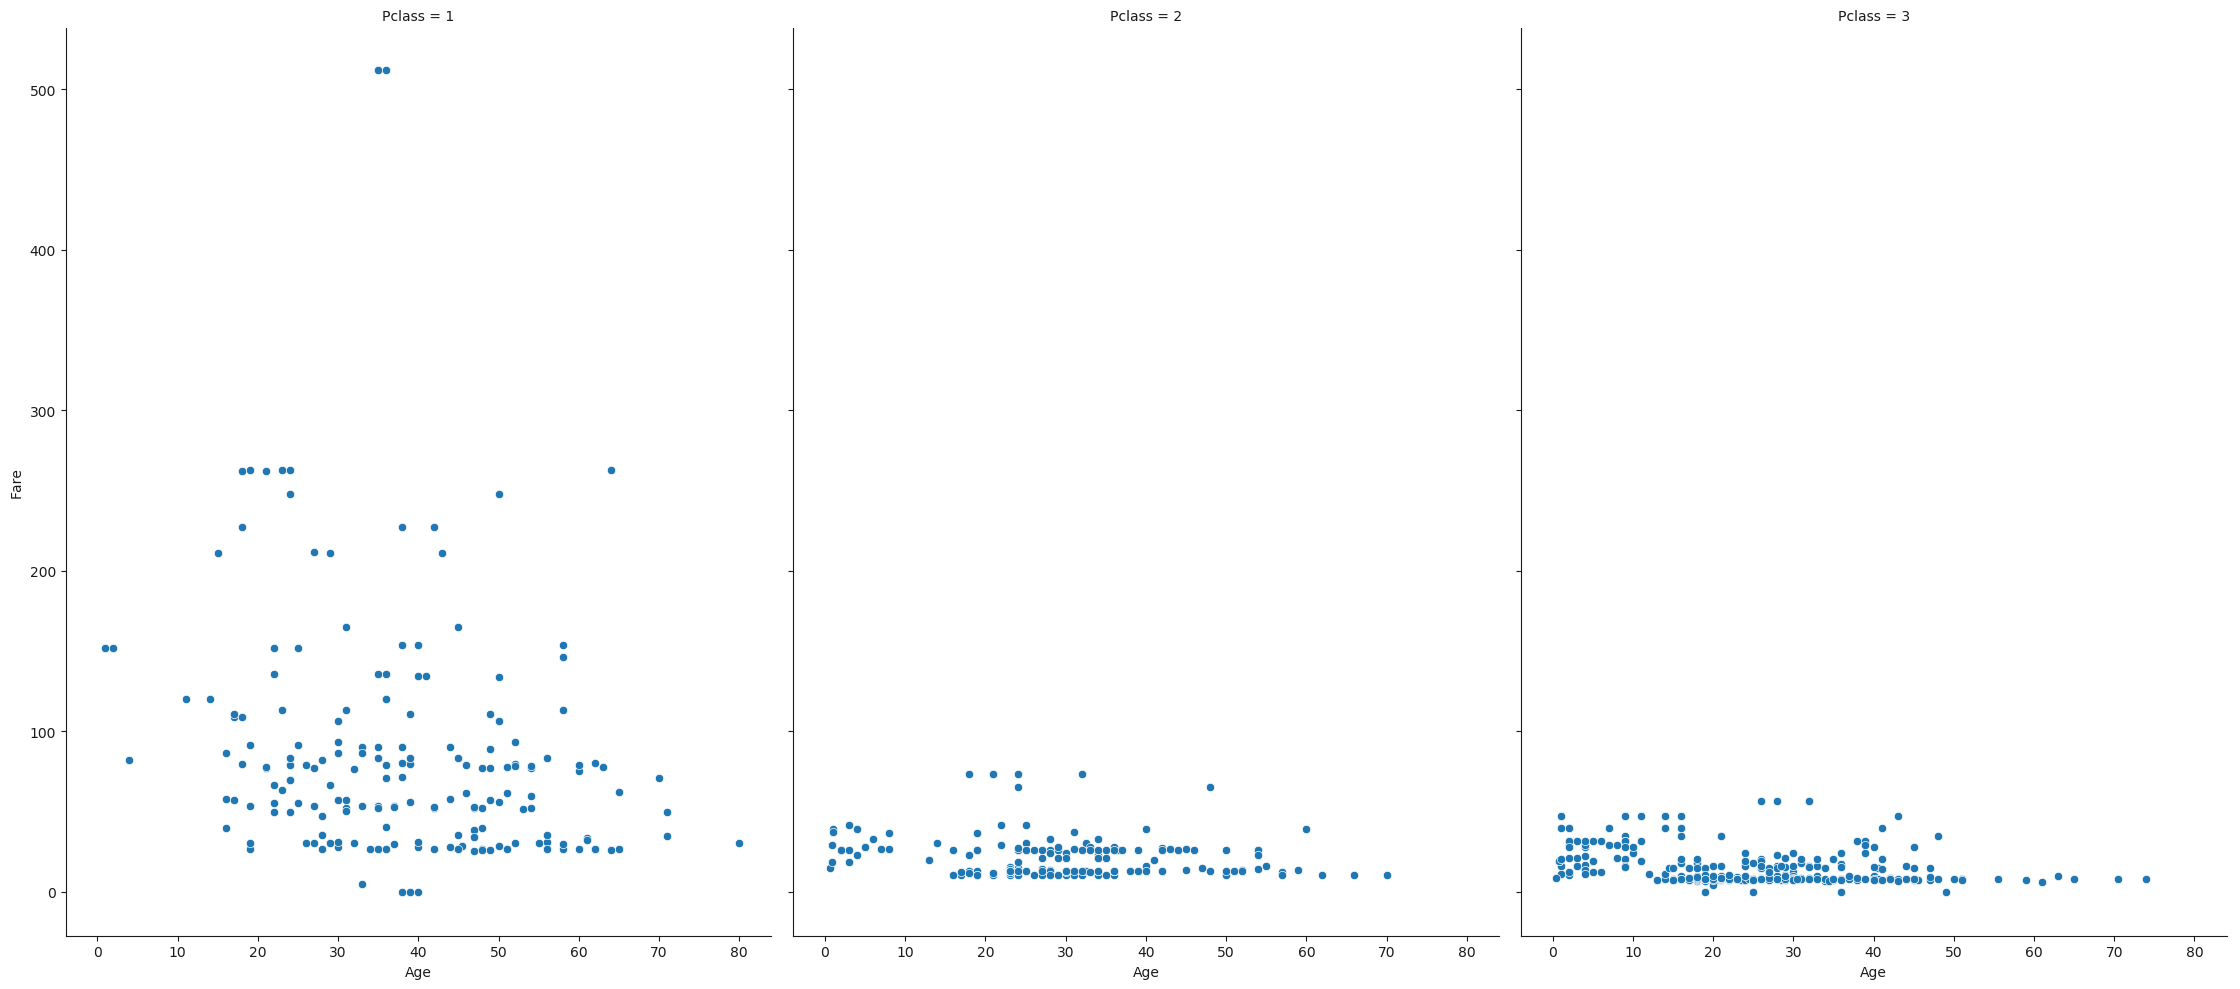

In [80]:
g = sns.FacetGrid(titanic, col="Pclass", height=10, aspect=.75)
g.map(sns.scatterplot,"Age","Fare")

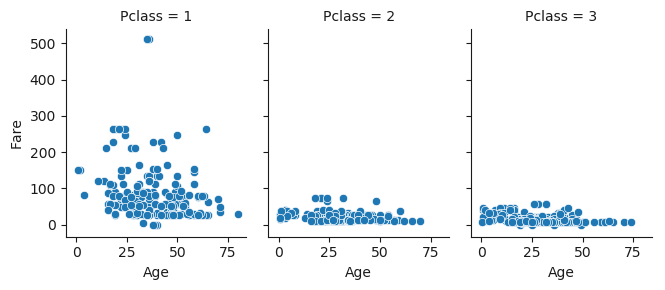

In [81]:
g = sns.FacetGrid(titanic, col="Pclass", height=3, aspect=.75)
g.map_dataframe(sns.scatterplot,"Age","Fare")

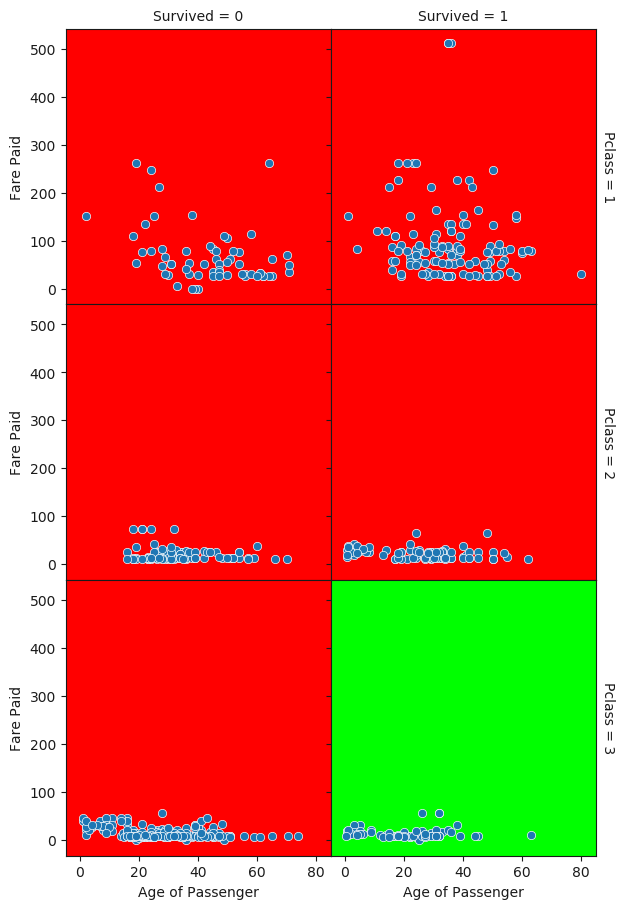

In [82]:
#hint from https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", margin_titles=True,despine=False)
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.set_axis_labels("Age of Passenger", "Fare Paid")
g.fig.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == 3 and col_val == 1:
        #(R,G,B,Alpha)
        ax.set_facecolor((0, 1, 0, 1))
    else:
        ax.set_facecolor((1, 0, 0, 1))

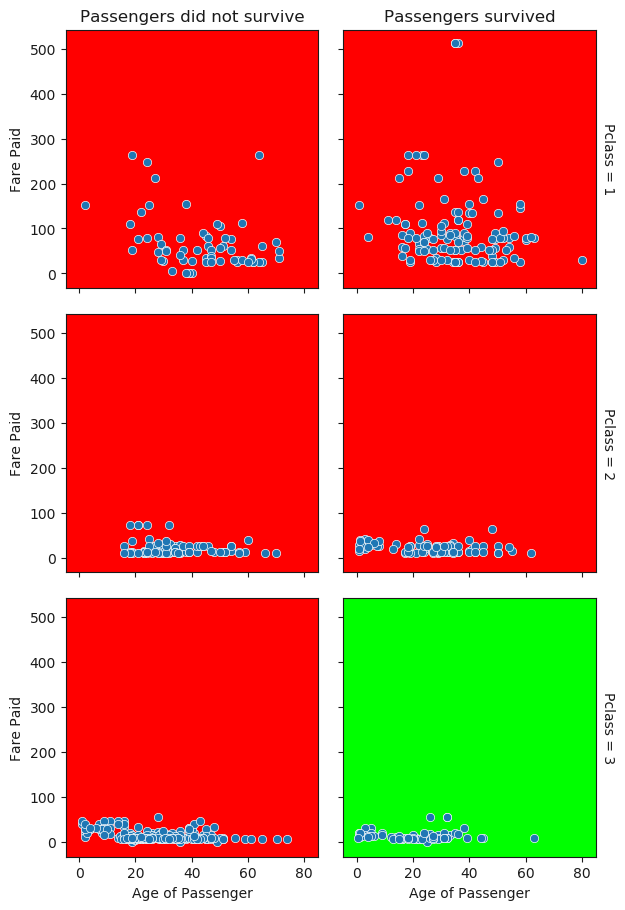

In [87]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", margin_titles=True,despine=False)
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.set_axis_labels("Age of Passenger", "Fare Paid")
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == 3 and col_val == 1:
        ax.set_facecolor((0, 1, 0, 1))
    else:
        ax.set_facecolor((1, 0, 0, 1))
        #ax.set_axis_off()
for (row_val, col_val), ax in g.axes_dict.items():
    if col_val == 0 and row_val==1:
        ax.set_title("Passengers did not survive")
    elif col_val == 1 and row_val== 1:
        ax.set_title("Passengers survived")

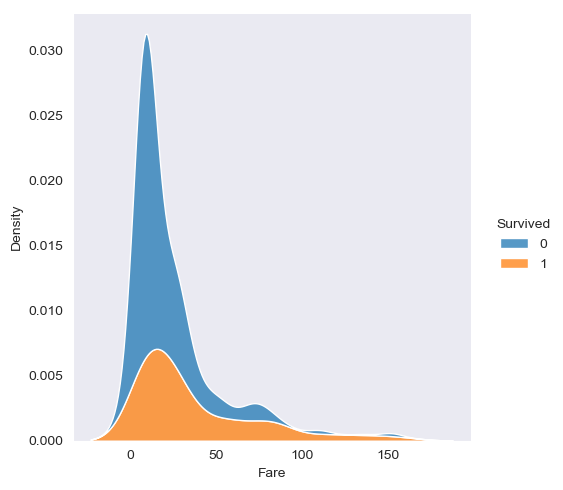

In [88]:
sns.set_style("dark")
sns.displot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack",kind="kde")

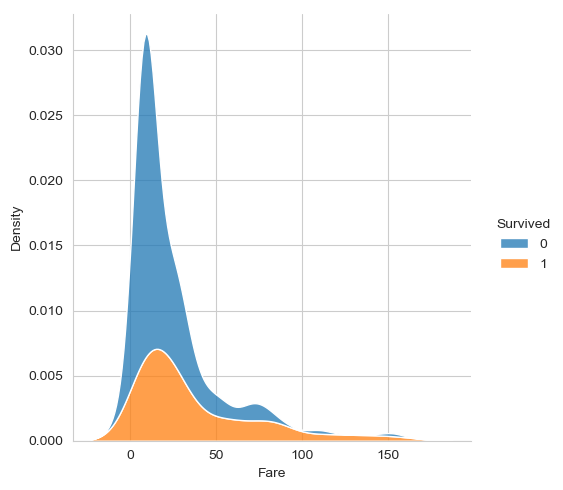

In [89]:
sns.set_style("whitegrid")
sns.displot(data=titanic[titanic['Fare']<=200],x="Fare",hue="Survived",multiple="stack",kind="kde")

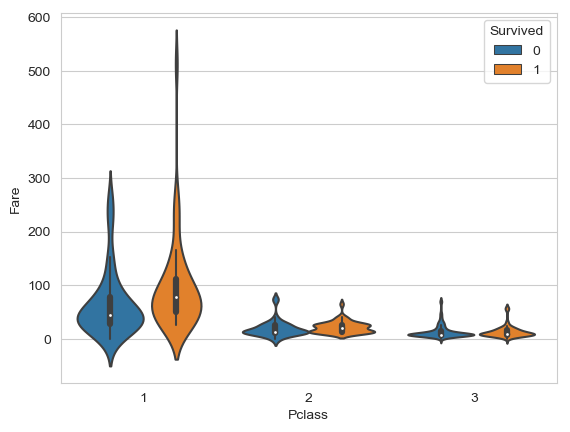

In [90]:
sns.violinplot(data=titanic,x="Pclass",y="Fare",hue="Survived")

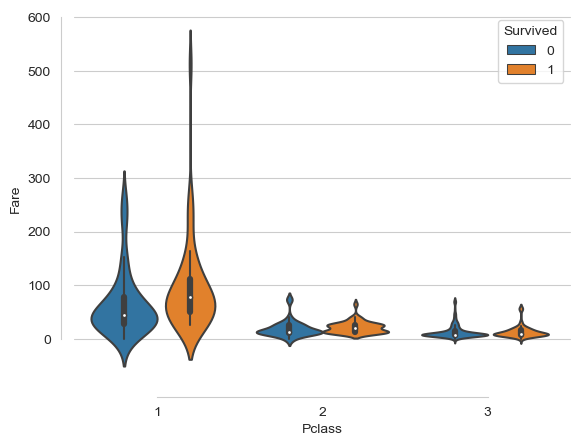

In [91]:
sns.violinplot(data=titanic,x="Pclass",y="Fare",hue="Survived")
sns.despine(offset=10, trim=True)

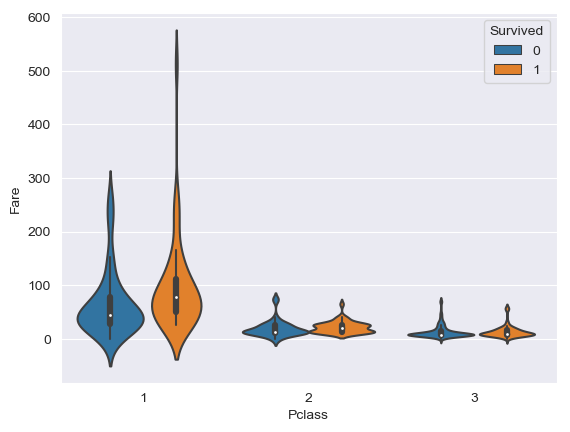

In [92]:
#to temporarily set the style
with sns.axes_style("darkgrid"):
    sns.violinplot(data=titanic,x="Pclass",y="Fare",hue="Survived")